In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.cluster import KMeans

C:\Users\86151\miniconda3\envs\text-mine\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

In [4]:
china = load_sample_image('china.jpg')

In [5]:
china

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

In [6]:
china.dtype

dtype('uint8')

In [7]:
china.shape

(427, 640, 3)

In [8]:
china[0][0]

array([174, 201, 231], dtype=uint8)

In [9]:
#unique color
newimage = china.reshape((427 * 640,3))
pd.DataFrame(newimage).drop_duplicates().shape

(96615, 3)

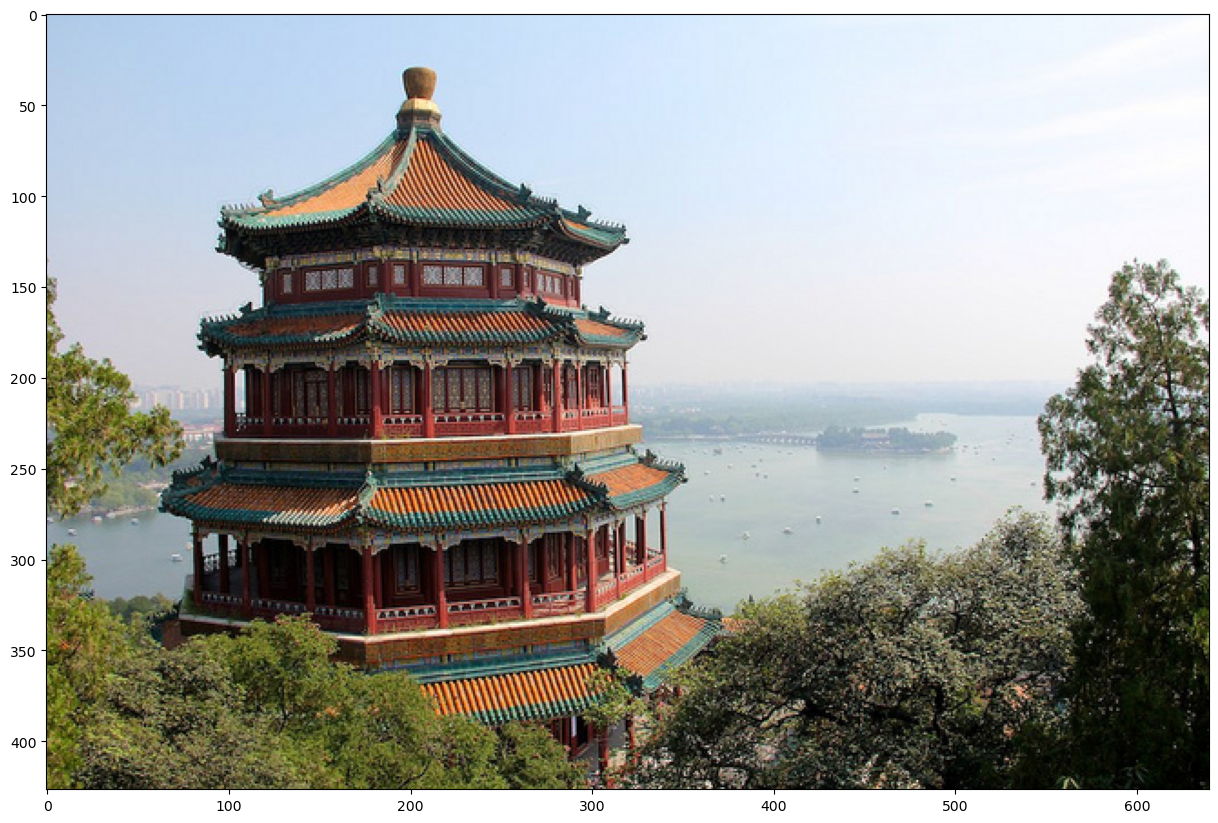

In [10]:
plt.figure(figsize=(15,15))
plt.imshow(china)

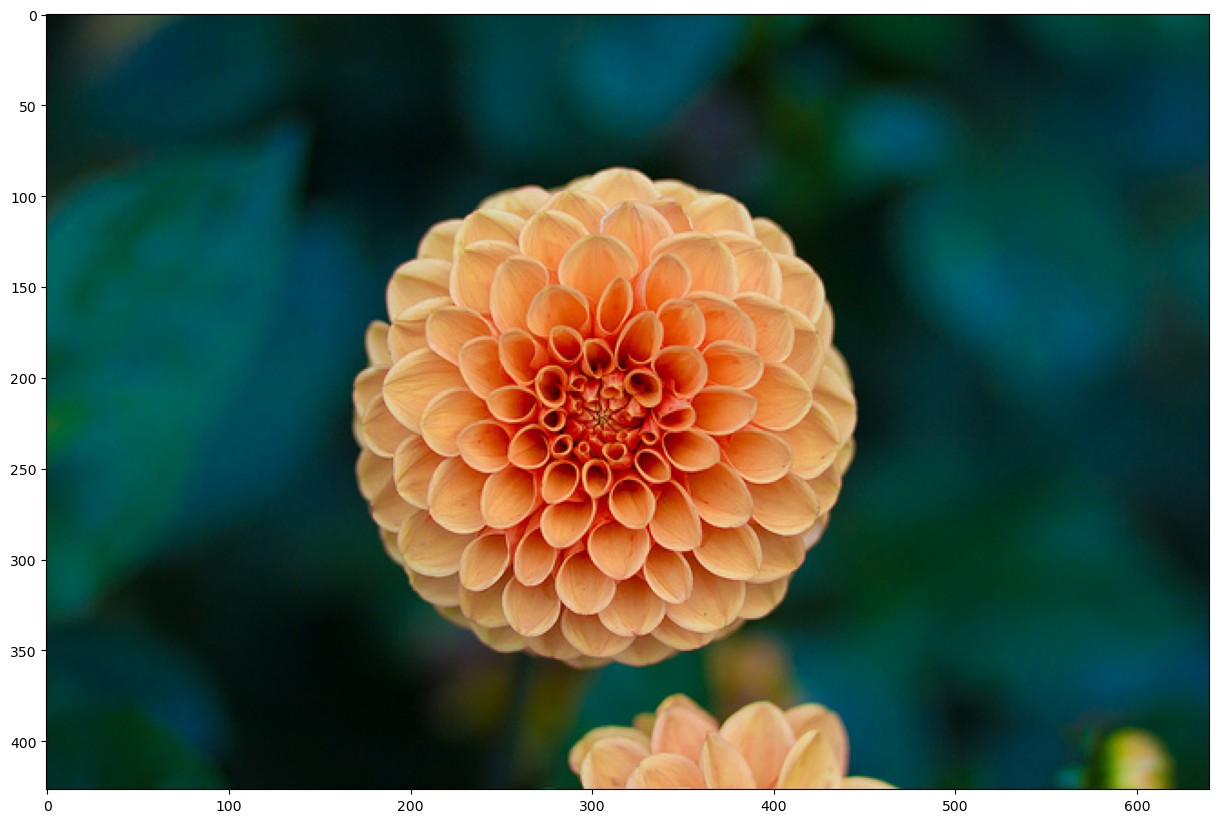

In [11]:
flower = load_sample_image('flower.jpg')
plt.figure(figsize=(15,15))
plt.imshow(flower)

In [12]:
n_clusters = 64
china = np.array(china,dtype=np.float64)/china.max()
w,h,d = original_shape = tuple(china.shape)#image to tuple
assert d == 3 #make sure always 3
image_array = np.reshape(china,(w * h, d))

In [13]:
image_array

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

In [14]:
image_array.shape

(273280, 3)

In [15]:
#find 64 centroids from 1000 data 
image_array_sample = shuffle(image_array,random_state = 0)[:1000]

In [16]:
image_array_sample.shape

(1000, 3)

In [17]:
kmeans = KMeans(n_clusters = n_clusters,random_state = 0).fit(image_array_sample)

C:\Users\86151\miniconda3\envs\text-mine\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\86151\miniconda3\envs\text-mine\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [18]:
kmeans.cluster_centers_.shape

(64, 3)

In [19]:
#use these centroid to predict all data labels
labels = kmeans.predict(image_array)
labels.shape

(273280,)

In [21]:
#use centroids to sustitute all points
image_kmeans = image_array.copy()

for i in range(w*h):
    image_kmeans[i] = kmeans.cluster_centers_[labels[i]]

In [22]:
image_kmeans.shape

(273280, 3)

In [23]:
pd.DataFrame(image_kmeans).drop_duplicates().shape

(64, 3)

In [24]:
#reshape back to image
image_kmeans = image_kmeans.reshape(w,h,d)
image_kmeans.shape

(427, 640, 3)

In [27]:
#random QV
centroid_random = shuffle(image_array, random_state=0)[:n_clusters]
labels_random = pairwise_distances_argmin(centroid_random,image_array,axis=0)

labels_random #each point to which centroids is closest

array([55, 55, 55, ..., 52, 60, 60], dtype=int64)

In [28]:
image_random = image_array.copy()
for i in range(w*h):
    image_random[i] = centroid_random[labels_random[i]]

In [29]:
image_random = image_random.reshape(w,h,d)
image_random.shape

(427, 640, 3)

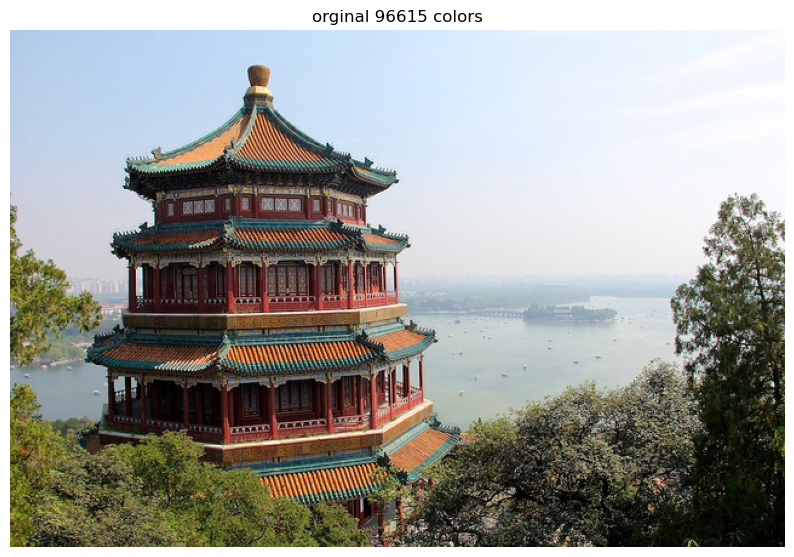

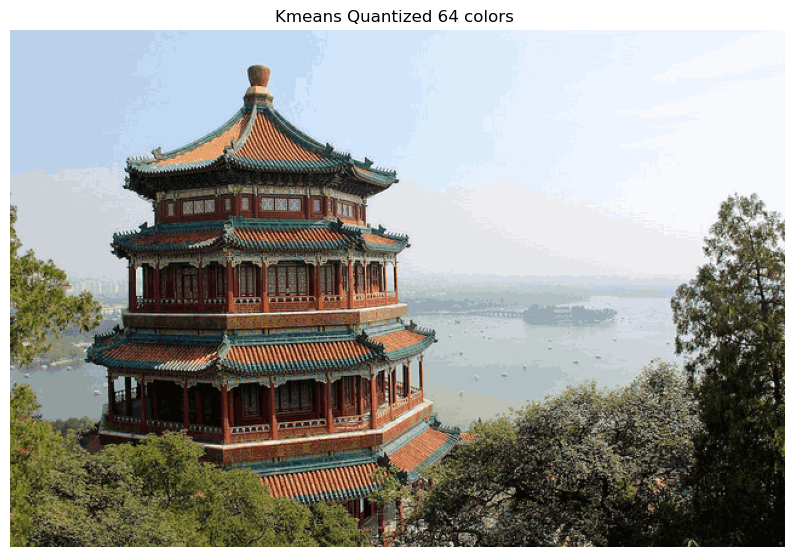

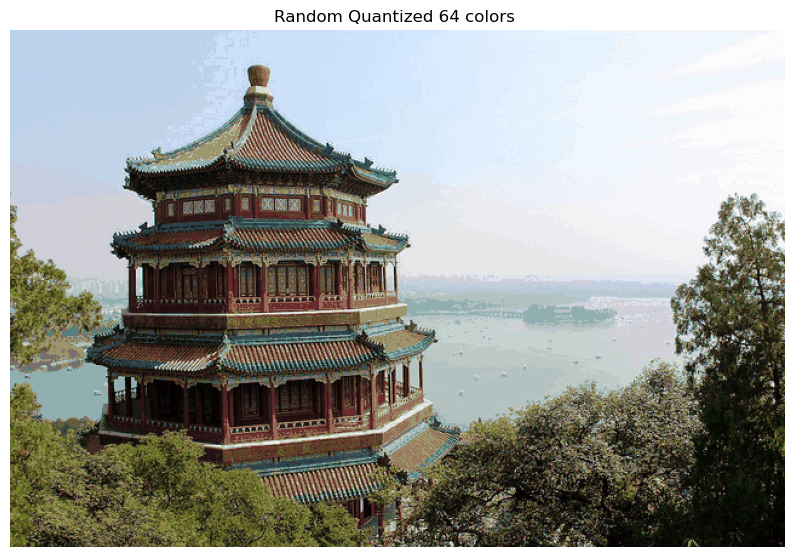

In [31]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('orginal 96615 colors')
plt.imshow(china)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Kmeans Quantized 64 colors ')
plt.imshow(image_kmeans)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Random Quantized 64 colors ')
plt.imshow(image_random)